# Dataset content review

In [2]:
%run __common.py
%load_ext autoreload
%autoreload 2

/iopsstor/scratch/cscs/stefschu/DSM500/github/modulus-a5275d8/modulus/distributed/manager.py:329: UserWarning: Distributed manager is already intialized
  warn("Distributed manager is already intialized")


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
static_dataset_path = "/iopsstor/scratch/cscs/stefschu/DSM500/data/FCN_ERA5_data_v0/"

sample_year = 1979
sample_path = os.path.join(static_dataset_path, "train", f"{sample_year}.h5")
lsm_path = os.path.join(static_dataset_path, "static", "land_sea_mask.nc")
geop_path = os.path.join(static_dataset_path, "static", "geopotential.nc")

In [5]:
lsm = np.array(nc.Dataset(lsm_path)["lsm"])
geop = np.array(nc.Dataset(geop_path)["z"])

lsm.shape, geop.shape

((1, 721, 1440), (1, 721, 1440))

In [6]:
with h5py.File(sample_path, 'r') as h5_file:
    sample = h5_file["fields"][:]
    
sample.shape

(1460, 21, 721, 1440)

## Data sample visualization

### Static data

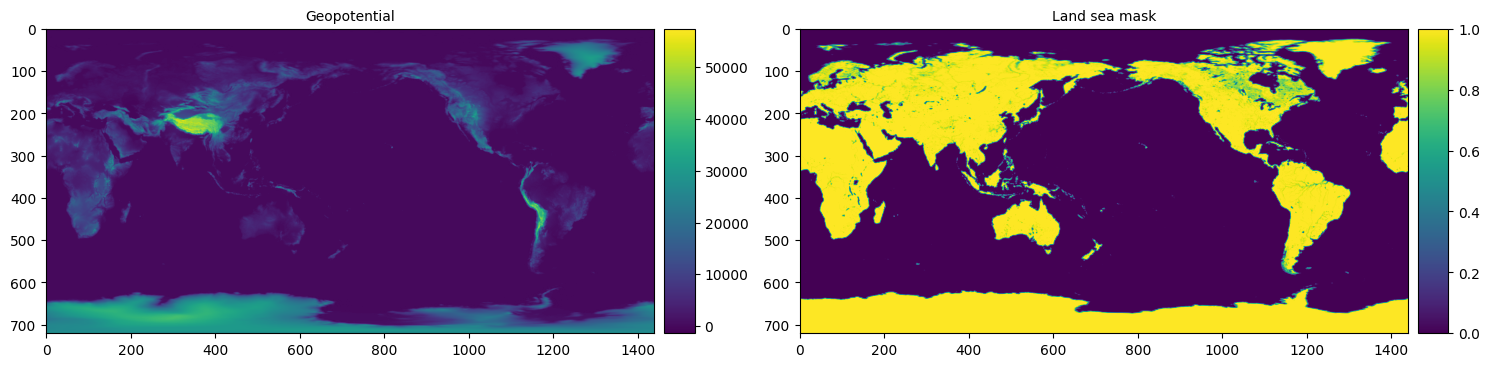

In [35]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
plot(geop[0], "Geopotential", axs[0])
plot(lsm[0], "Land sea mask", axs[1], last=True)

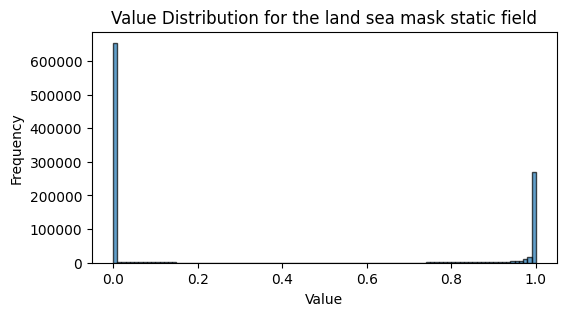

In [40]:
plt.figure(figsize=(6, 3))
plt.hist(lsm[0].flatten(), bins=100, edgecolor='k', alpha=0.7)
plt.title("Value Distribution for the land sea mask static field")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.show()

##### Comment
- The geopotential at surface (1000 hPa) is meant to represent the orography.
- The land sea mask is almost a binary classification: either is land or sea, but there are a few values in between, which might represents intermediate values for those pixels at the edge between land and sea, given that at this resolution a pixel represents several km.

## Dataset

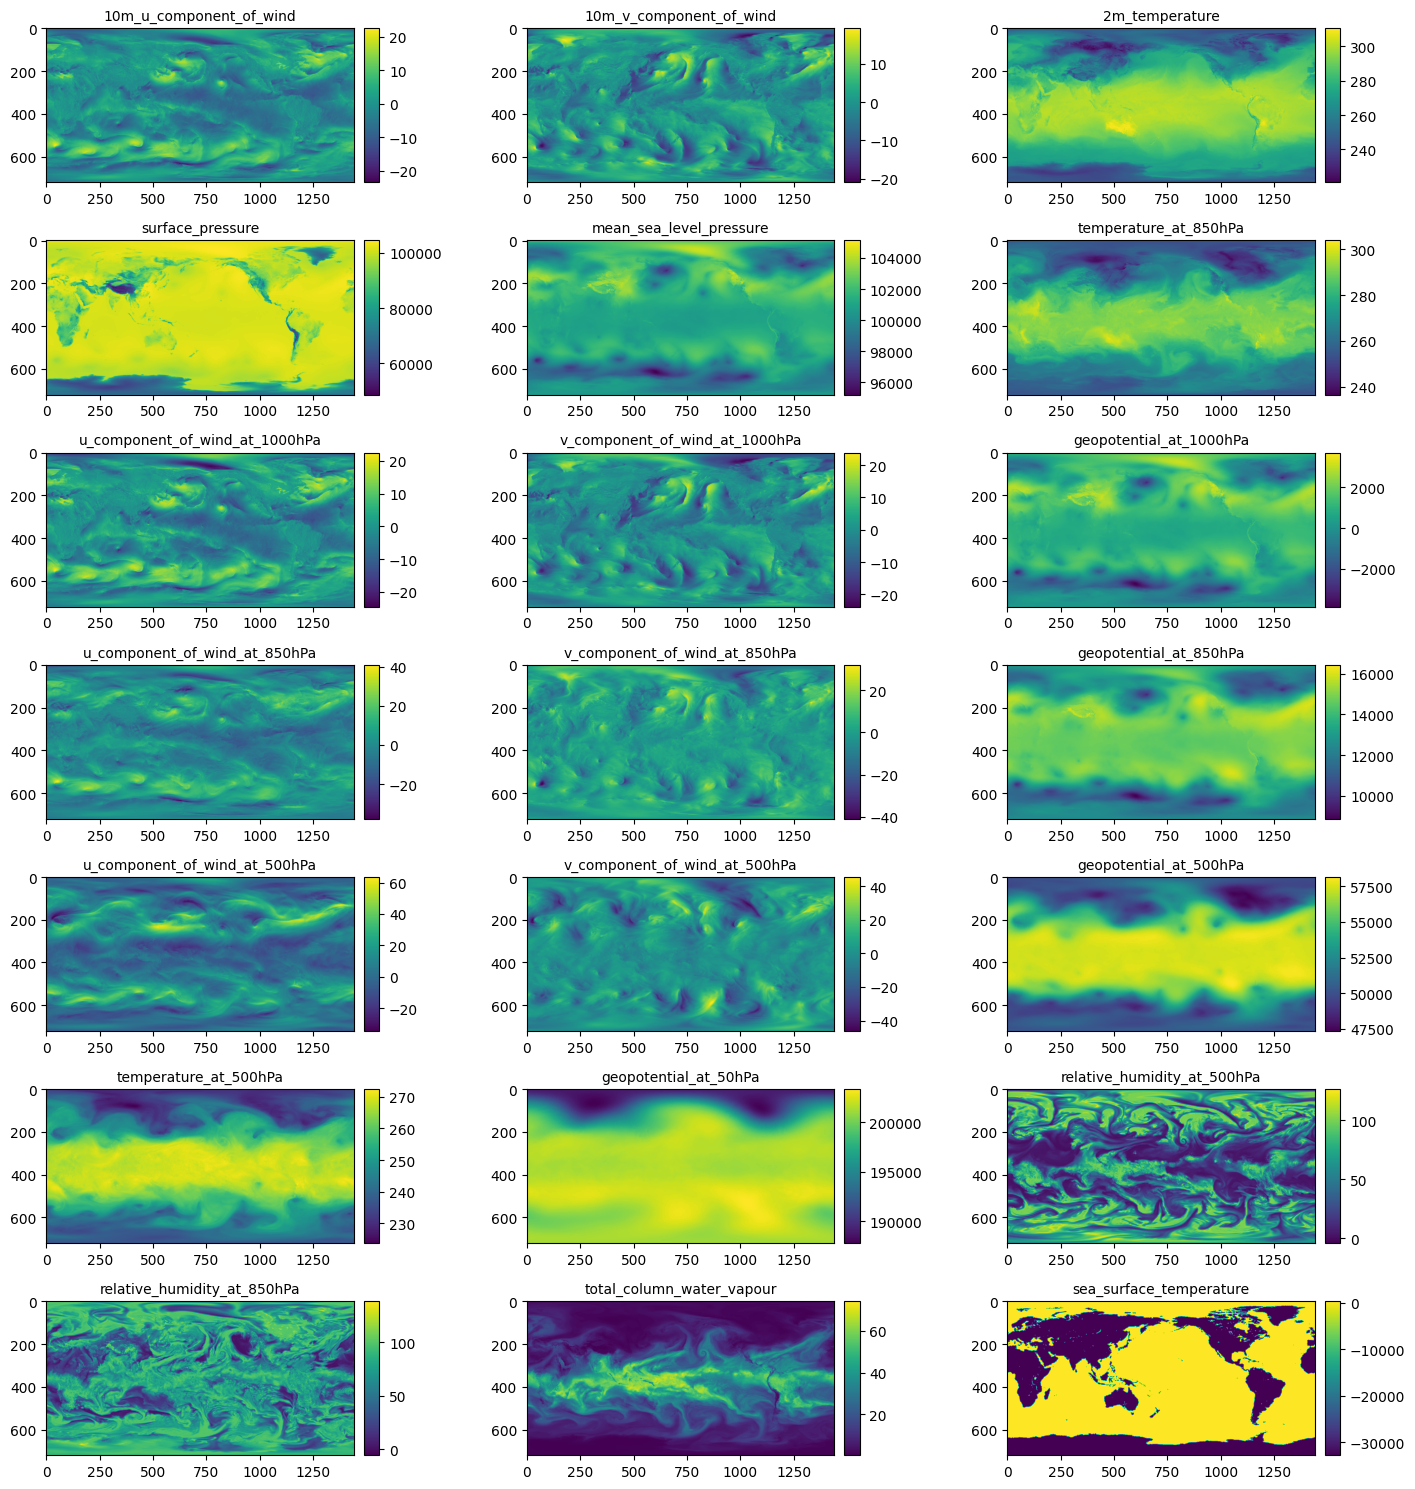

In [47]:
time_idx = 0
fig, axs = plt.subplots(7, 3, figsize=(15, 15))
for channel_data, ax, label in zip(sample[time_idx], axs.flatten(), metadata["coords"]["channel_labels"]):
    plot(channel_data, label, ax)
plt.show()

## Data reviews

In [33]:
mins = sample.min(axis=(2, 3))
maxs = sample.max(axis=(2, 3))

In [24]:
mins.shape

(1460, 21)

In [27]:
def plot_histograms(data, title):
    fig, axes = plt.subplots(3, 7, figsize=(15, 5))
    axes = axes.flatten()

    for i in range(data.shape[1]):
        axes[i].hist(data[:, i], bins=50)
        axes[i].set_title(metadata["coords"]["channel_labels"][i])
        axes[i].set_xlabel('Value')
        axes[i].set_ylabel('Frequency')


    fig.suptitle(title, fontsize=20, fontweight='bold', y=1.02)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

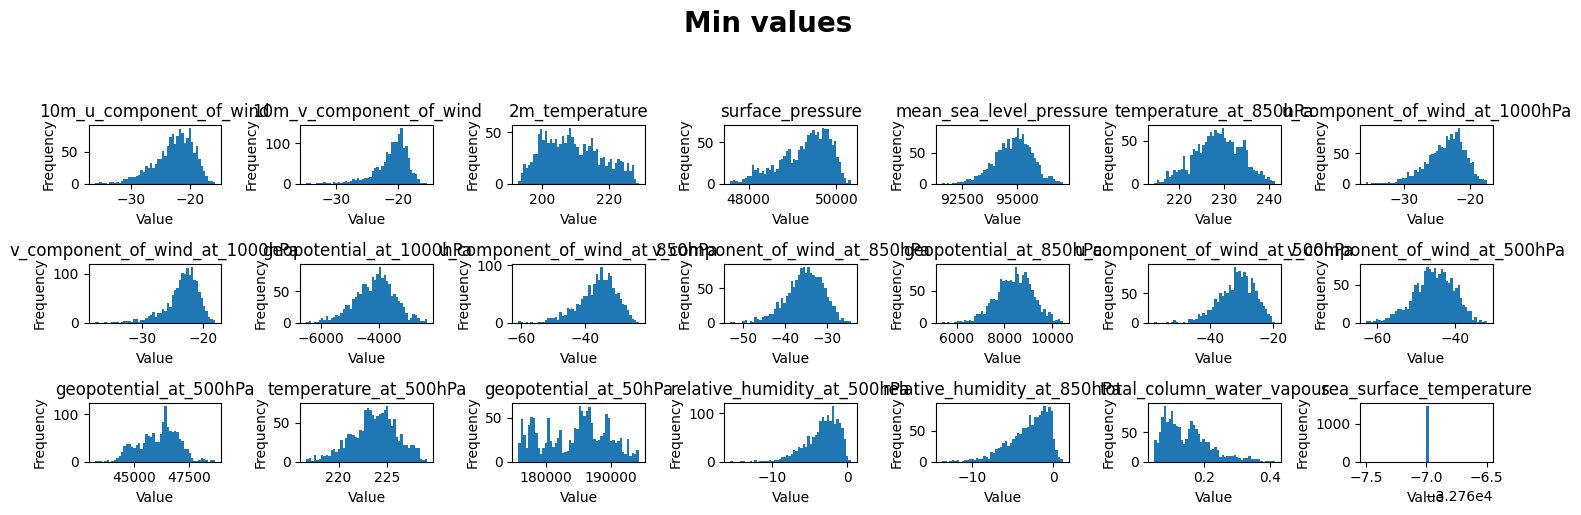

In [28]:
plot_histograms(mins, "Min values")

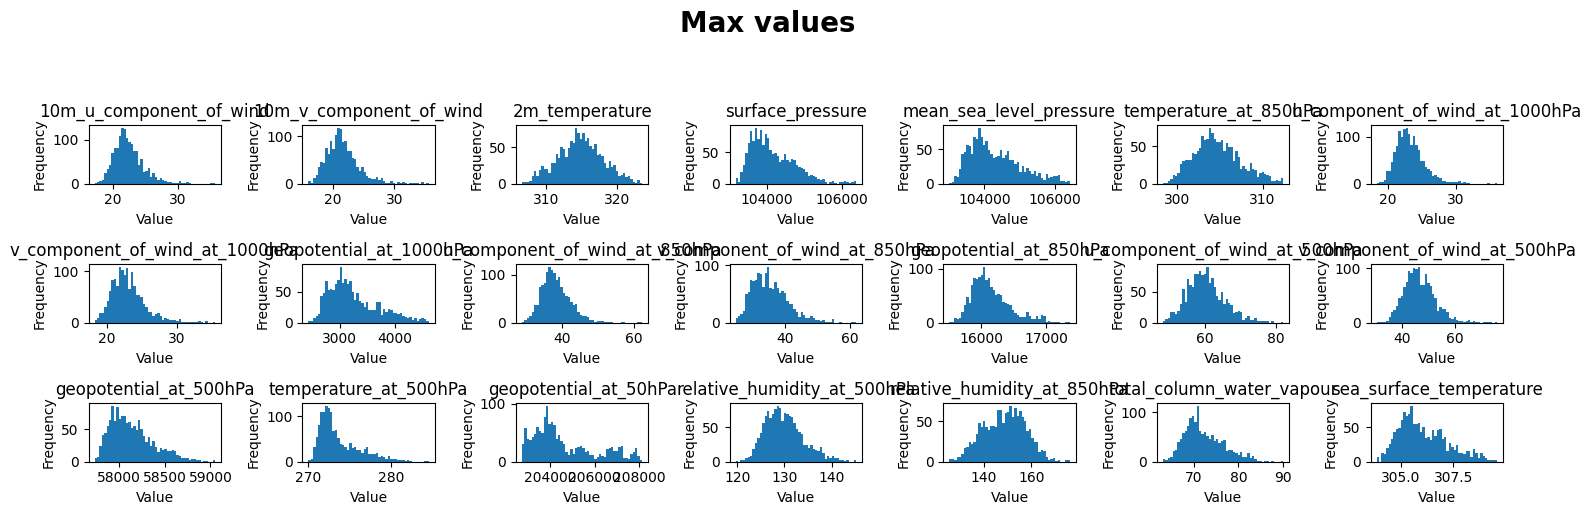

In [30]:
plot_histograms(maxs, "Max values")